In [131]:
import numpy as np


def reactive_price_by_trade_qty(qty_trade, usage, step, elec_rate):
    _step = step[1:]
    min_usage = step[1]
    # 전력량요금
    elec_rate = elec_rate[:-1]

    if usage < min_usage:
        return 0

    # [demand2, demand1]
    demands = usage - _step
    demands = np.where(demands > 0, demands, 0)

    err_demands = demands[1] - demands[0]
    output_price = ((elec_rate[1] - elec_rate[0]) / err_demands) * qty_trade -\
        (elec_rate[1] * demands[0] - elec_rate[0] * demands[1]) / (err_demands)

    return output_price

In [135]:
usages = 250
reactive_price_by_trade_qty(5, usages, np.array([0, 200, 400]), np.array([78.2, 147.2, 215.5]))

140.29999999999998

In [136]:
def my_reactive(qty_trade, usage, step, elec_rate):
    _step = step[1:]
    min_usage = step[1]
    
    demands = usage - _step
    demands = np.where(demands > 0, demands, 0)
    
    
    x_2 = demands[0] - demands[1]
    x_1 = demands[1] * -1
    y_2 = elec_rate[0]
    # 임시 y_1
    y_1 = elec_rate[1]
    
    gradient = (y_2 - y_1) / (x_2 - 0)
    fx = lambda x: gradient * x + y_1
    
    y_1 = fx(x_1)
    fx = lambda x: gradient * x + y_1
    
    return fx(qty_trade)

In [138]:
usages = 250
my_reactive(5, usages, np.array([0, 200, 400]), np.array([78.2, 147.2, 215.5]))

140.29999999999998

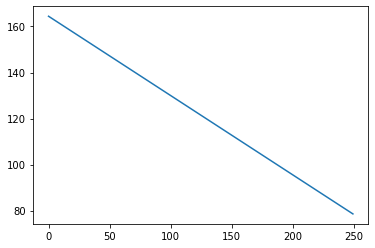

In [57]:
import matplotlib.pyplot as plt

usages = 450
price_mem_1 = []

for qty in range(0, 450 - 200):
    price_mem_1.append(
        reactive_price_by_trade_qty(qty, usages, np.array([0, 200, 400]), np.array([78.2, 147.2, 215.5]))
    )
    
plt.plot(price_mem_1)
plt.show()

In [58]:
price_mem_1

[164.45,
 164.105,
 163.76,
 163.415,
 163.07,
 162.725,
 162.38,
 162.035,
 161.69,
 161.345,
 161.0,
 160.655,
 160.31,
 159.965,
 159.61999999999998,
 159.27499999999998,
 158.92999999999998,
 158.58499999999998,
 158.23999999999998,
 157.89499999999998,
 157.54999999999998,
 157.20499999999998,
 156.85999999999999,
 156.515,
 156.17,
 155.825,
 155.48,
 155.135,
 154.79,
 154.445,
 154.1,
 153.755,
 153.41,
 153.065,
 152.72,
 152.375,
 152.03,
 151.685,
 151.34,
 150.995,
 150.64999999999998,
 150.305,
 149.95999999999998,
 149.61499999999998,
 149.26999999999998,
 148.92499999999998,
 148.57999999999998,
 148.23499999999999,
 147.89,
 147.545,
 147.2,
 146.855,
 146.51,
 146.165,
 145.82,
 145.475,
 145.13,
 144.785,
 144.44,
 144.095,
 143.75,
 143.405,
 143.06,
 142.715,
 142.37,
 142.025,
 141.68,
 141.33499999999998,
 140.99,
 140.64499999999998,
 140.29999999999998,
 139.95499999999998,
 139.60999999999999,
 139.265,
 138.92,
 138.575,
 138.23,
 137.885,
 137.54,
 137.195,
 

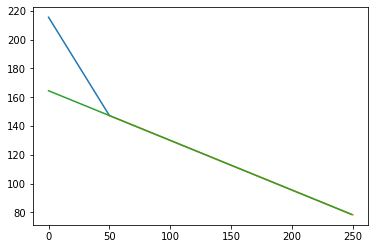

In [42]:
elec_rate = np.array([78.2, 147.2, 215.5])
steps = np.array([0, 200, 400])

plt.plot([0, 50], [215.5, 147.2])
plt.plot([50, 250], [147.2, 78.2])
plt.plot(price_mem_1)

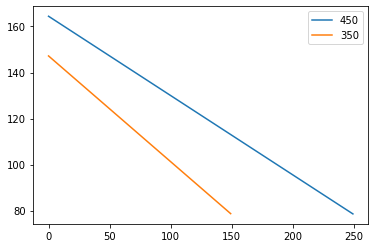

In [31]:
import matplotlib.pyplot as plt

usages = 350
price_mem_2 = []

for qty in range(0, 350 - 200):
    price_mem_2.append(
        reactive_price_by_trade_qty(qty, usages, np.array([0, 200, 400]), np.array([78.2, 147.2, 215.5]))
    )
    
plt.plot(price_mem_1, label="450")
plt.plot(price_mem_2, label="350")

plt.legend()
plt.show()